# reducing strip noise based on fft

In [14]:
#import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
%matplotlib inline

In [32]:
with open('cj-3-rad-ref-cpi.dat') as f:
    data = np.fromfile(f,dtype=np.int32)
image = data.reshape(325,2347,1004)[60,:,:]
del data

In [33]:
image = (image-1e9)*1e-9

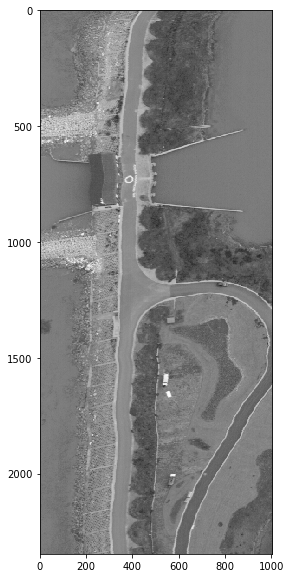

In [34]:
data_d.shape
plt.figure(figsize=(6,10))
plt.imshow(data_d,cmap='gray')

In [35]:
sample_line = image[700]

(0, 1)

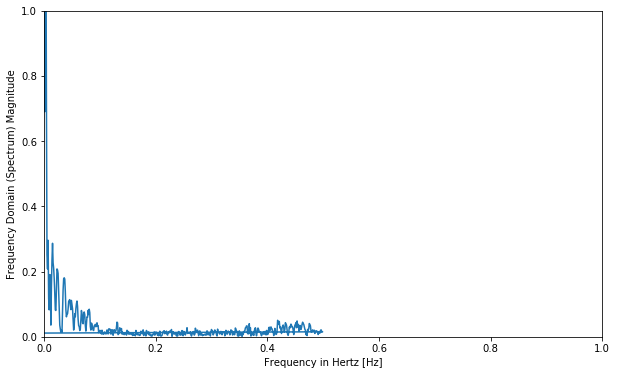

In [44]:
X = fftpack.fft(sample_line)
freqs = fftpack.fftfreq(len(sample_line))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

## plot the spectrum magnitude

2347 1004


C:\Users\pyqsm\Anaconda2\envs\python35\lib\site-packages\scipy\fftpack\basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


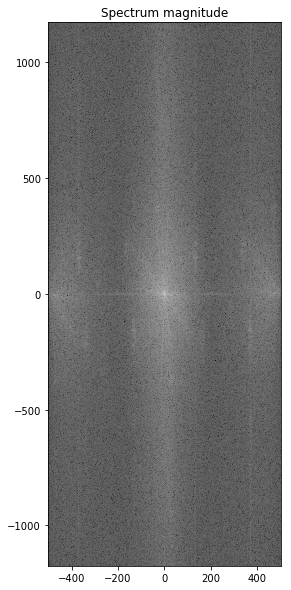

In [37]:
M,N = image.shape
print(M,N)
F = fftpack.fftn(image)

F_magnitude = np.abs(F)
F_magnitude = fftpack.fftshift(F_magnitude)

f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(np.log(0+F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude')

## gassian curve for masking 

(2347,) (1004,)


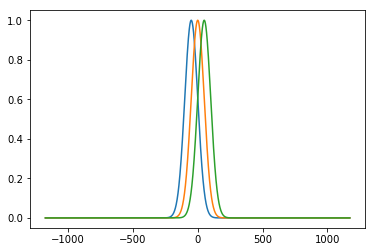

In [38]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.arange(-M//2, M//2)
print(x_values.shape,np.arange(-N//2, N//2).shape)
for mu, sig in [(-50, 50), (0, 50), (50, 50)]:
    mp.plot(x_values, gaussian(x_values, mu, sig))

mp.show()

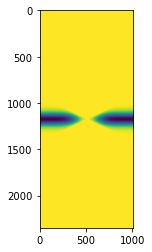

In [45]:
mask = np.ones_like(F_dim,dtype=np.int32)

x = np.arange(-M//2,M//2)
mask_h = np.array(list(gaussian(x=x,mu=0,sig=50))*N).reshape(N,M)
mask_h = mask_h
mask_h = 1-mask_h.transpose()
# gg[:,N//2-(502-372):N//2+(502-372)] = 1

x = np.arange(-N//2,N//2)
mask_v = np.array(list(gaussian(x=x,mu=0,sig=100))[:]*M).reshape(M,N)
mask_v = mask_v
mask = mask_h+mask_v

mask[mask>1]=1.0

plt.imshow(mask)

## some results

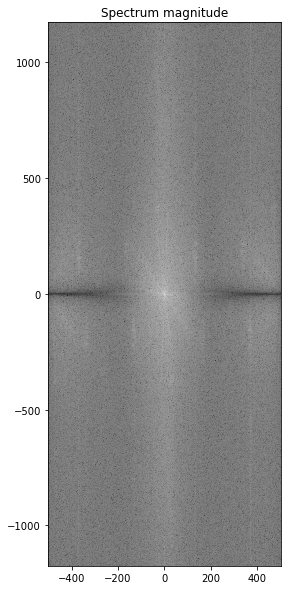

In [46]:
F_dim = F.copy()
F_dim = F_dim*fftpack.fftshift(mask)

# image_filtered = np.real(fftpack.ifft2(F_dim_i))

F_magnitude_i = np.abs(F_dim)
F_magnitude_i = fftpack.fftshift(F_magnitude_i)

f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(np.log(F_magnitude_i), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude')

C:\Users\pyqsm\Anaconda2\envs\python35\lib\site-packages\scipy\fftpack\basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


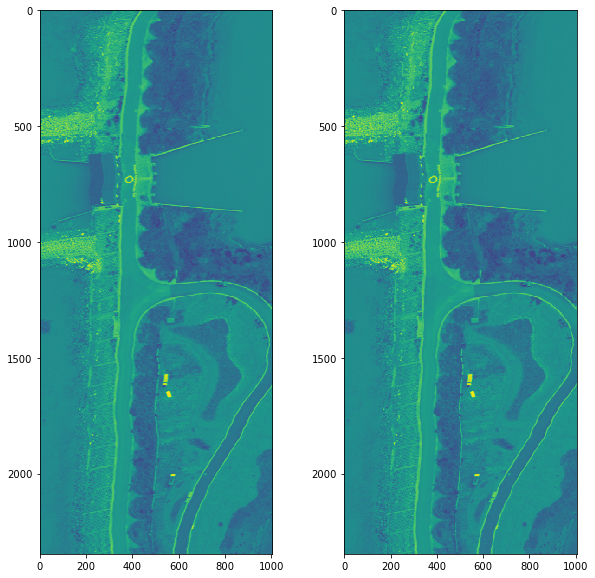

In [47]:
image_filtered = np.real(fftpack.ifft2(F_dim))
plt.figure(figsize=(10,10))
plt.subplot(121)
# plt.imshow(image_filtered[200:500,800:])
plt.imshow(image_filtered)
plt.subplot(122)
# plt.imshow(image[200:500,800:])
plt.imshow(data_d)

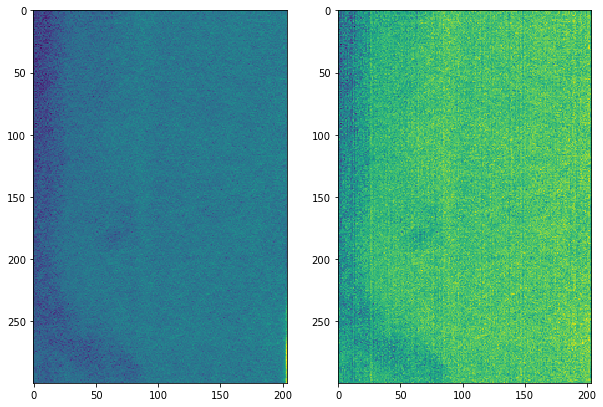

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(image_filtered[200:500,800:])
plt.subplot(122)
plt.imshow(data_d[200:500,800:])

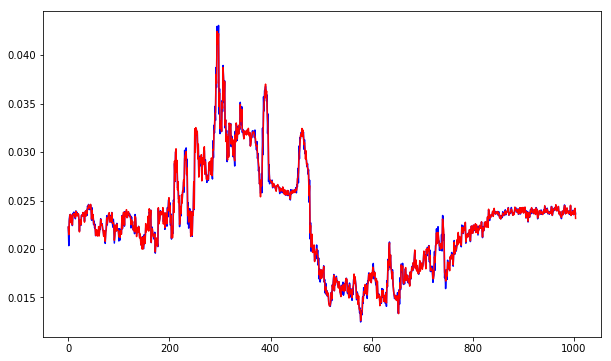

In [49]:
plt.figure(figsize=(10,6))
plt.plot(image[100],'b')
plt.plot(image_filtered[100],'r')